Note: Please go through the document in the repo to understand approaches taken

Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np

import time
from random import sample

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.datasets import make_imbalance
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


1.Exploratory Data Analysis

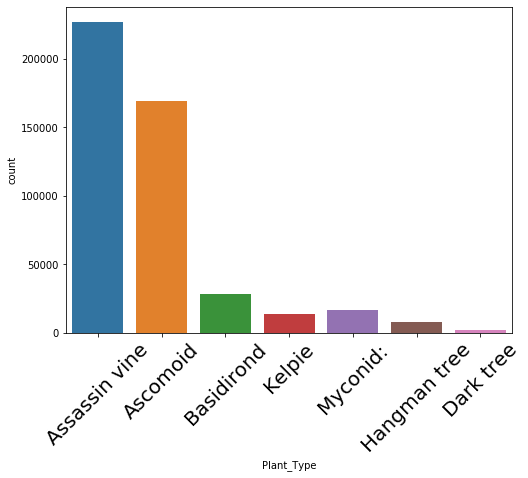

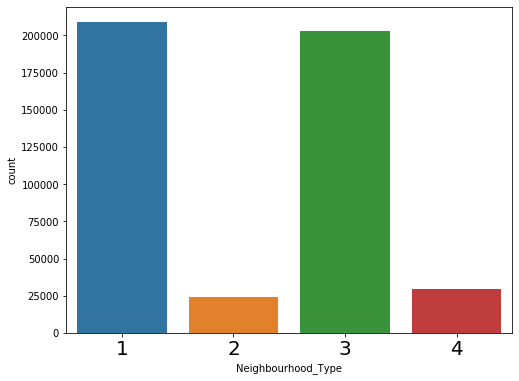

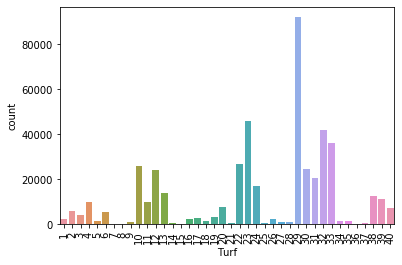

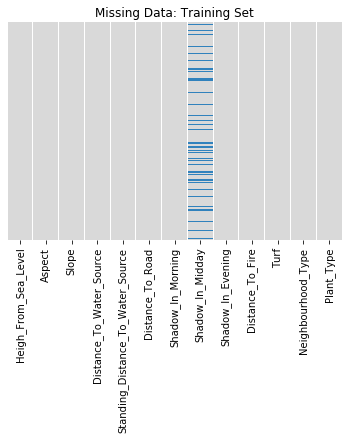

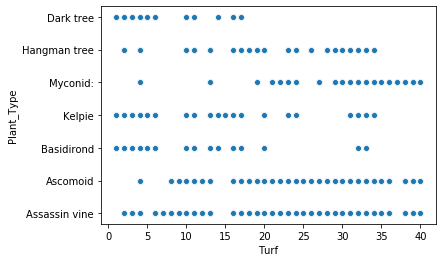

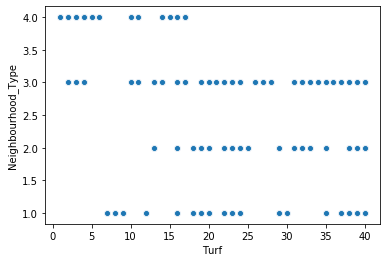

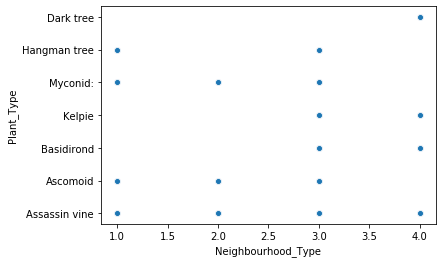

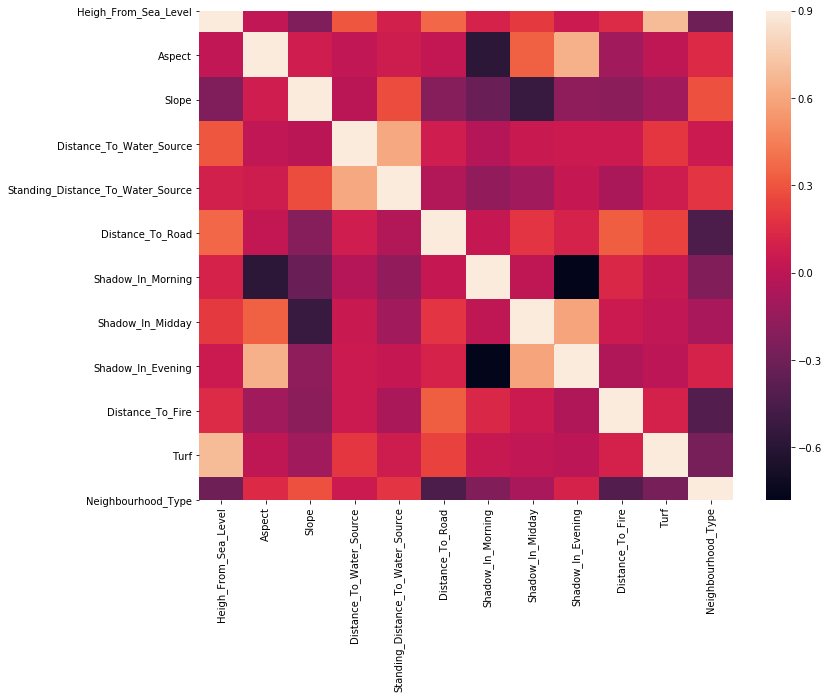

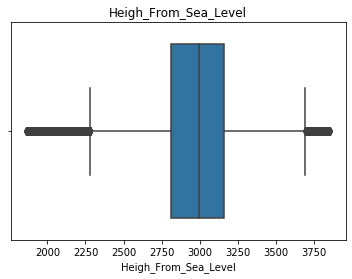

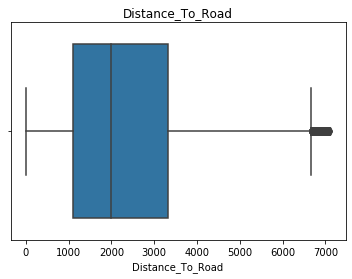

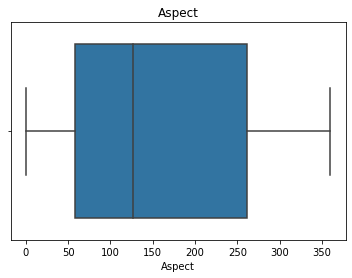

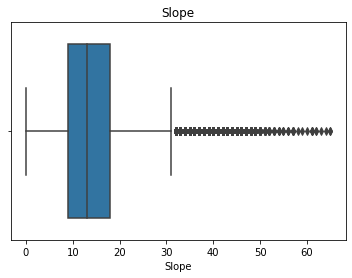

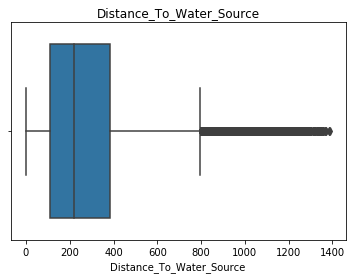

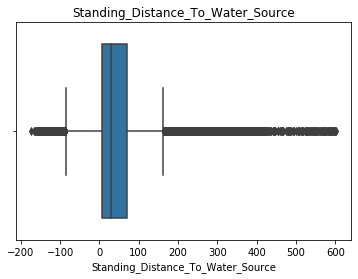

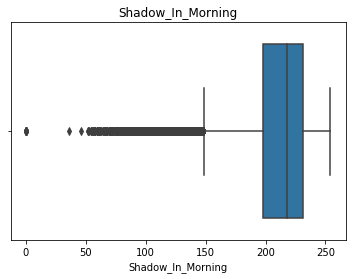

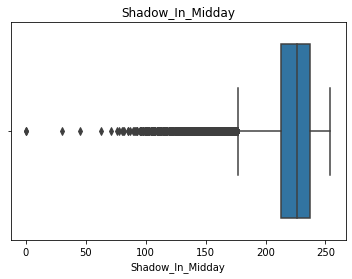

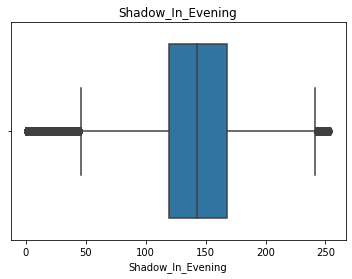

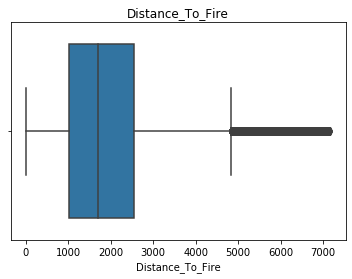

In [3]:
train = pd.read_csv("capstone_train.csv")
test = pd.read_csv("capstone_test.csv")

#        print statements provide basic stats regarding each column grouped by Plant_Type and missing values info

#print(train.groupby('Plant_Type').describe())
#print(train.isnull().sum()/len(train)*100)

#       plot provides count of each Plant_Type 
plt.figure(figsize=(8,6))
sns.countplot(train['Plant_Type'])
plt.xticks(fontsize=20,rotation=45)
plt.show()

#       plot provides count of each Neighbourhood_Type type 
plt.figure(figsize=(8,6))
sns.countplot(train['Neighbourhood_Type'])
plt.xticks(fontsize=20)
plt.show()

#        plot provides count of each turf type                 
sns.countplot(train['Turf'])
plt.xticks(fontsize=10,rotation=90)
plt.show()

#       Plot shows missing values in each column
sns.heatmap(train.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

#       plots to analyse distribution of Plant_Types in different Turfs and Neighbourhood_Types
sns.scatterplot(x=train["Turf"], y=train["Plant_Type"])
plt.show()
sns.scatterplot(x=train["Turf"], y=train["Neighbourhood_Type"])
plt.show()
sns.scatterplot(x=train["Neighbourhood_Type"], y=train["Plant_Type"])
plt.show()
num_cols=['Heigh_From_Sea_Level','Distance_To_Road','Aspect','Slope','Distance_To_Water_Source','Standing_Distance_To_Water_Source','Shadow_In_Morning','Shadow_In_Midday','Shadow_In_Evening','Distance_To_Fire']
cat_cols=['Neighbourhood_Type','Turf']

#       correlation map doesnt show strong linear relationship between numerical input features of train data
corr_matrix = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)
plt.show()

#      box plots to analyse spread spread of each feature
for col in num_cols:
    sns.boxplot(train[col])
    plt.title(col)
    plt.show()





2.Data Preprocessing

In [4]:
mean=train['Shadow_In_Midday'].mean()
#       filling missing values in train and test data set
train['Shadow_In_Midday'].fillna(mean,inplace=True)
test['Shadow_In_Midday'].fillna(mean,inplace=True)
#       dropping outliers in Shadow_In_Midday and Shadow_In_Morning
train.drop(train.index[train['Shadow_In_Midday'] <40], inplace = True)
train.drop(train.index[train['Shadow_In_Morning'] <40], inplace = True)


#print(x_train.describe())

3.Feature Engineering

In [5]:
#    original version of data set for tree based algorithms
x_train1,y_train1=train.drop('Plant_Type', axis=1), train['Plant_Type']
x_test1,y_test1=test.drop('Plant_Type', axis=1), test['Plant_Type']

#    one hot encode and normalize data set version for svm
numerical_columns=['Heigh_From_Sea_Level','Distance_To_Road','Aspect','Slope','Distance_To_Water_Source','Standing_Distance_To_Water_Source','Shadow_In_Morning','Shadow_In_Midday','Shadow_In_Evening','Distance_To_Fire']
categorical_columns=['Neighbourhood_Type','Turf']
column_trans = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore'),categorical_columns),
    ( MinMaxScaler(),numerical_columns))
x_train2=column_trans.fit_transform(x_train1)
x_test2=column_trans.transform(x_test1)
y_train2=y_train1.copy()
y_test2=y_test1.copy()

print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)
print(x_train2.shape,y_train2.shape,x_test2.shape,y_test2.shape)


(464793, 12) (464793,) (116203, 12) (116203,)
(464793, 54) (464793,) (116203, 54) (116203,)


4.Data Preparation for Predictive Modeling

In [6]:
#sm = SMOTE()
#x_trainre, y_trainre= sm.fit_resample(x_train, y_train)
#print(x_trainre.shape)

#     making class balanced version of data set just for experiments
X_train1, Y_train1 = make_imbalance(x_train1, y_train1,
                      sampling_strategy={'Ascomoid': 2184, 'Assassin vine': 2184, 'Basidirond': 2184, 'Dark tree':2184, 'Hangman tree':2184, 'Kelpie':2184, 'Myconid:':2184})
X_train2, Y_train2 = make_imbalance(x_train2, y_train2,
                      sampling_strategy={'Ascomoid': 2184, 'Assassin vine': 2184, 'Basidirond': 2184, 'Dark tree':2184, 'Hangman tree':2184, 'Kelpie':2184, 'Myconid:':2184})
print(X_train1.shape,Y_train1.shape,x_test1.shape,y_test1.shape)
print(X_train2.shape,Y_train2.shape,x_test2.shape,y_test2.shape)


(15288, 12) (15288,) (116203, 12) (116203,)
(15288, 54) (15288,) (116203, 54) (116203,)


5.Classification Model Predictions

In [6]:
#     hyper parameter tuning for various algorithms based on the class balanced version of the data set   


#f1 = make_scorer(f1_score , average='weighted')

#      RandomForest classifier  with Hyperparamter Tuning

#n_estimators = [50,100,300]
#max_depth = [5,10,20]
#min_samples_split = [2, 5, 15]
#min_samples_leaf = [1, 2, 5] 
#randomforest = RandomForestClassifier()
#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#              min_samples_split = min_samples_split, 
#             min_samples_leaf = min_samples_leaf)
#gridF = GridSearchCV(randomforest, hyperF, cv = 3,scoring=f1)
#gridF.fit(X_train1, Y_train1)
#print("best params Random Forest Classifier:")
#print(gridF.best_params_)

#     XGBoost classifier  with Hyperparamter Tuning

#n_estimators = [100,200,300]
#max_depth = [5,7,10,20]
#xgb = XGBClassifier(objective = "multi:softmax")
#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth )
#gridF = GridSearchCV(xgb, hyperF, cv = 3,n_jobs =-1,scoring=f1)
#gridF.fit(X_train1, Y_train1)
#print("best params xgboost Classifier:")
#print(gridF.best_params_)

#       SVM Model with Hyperparamter Tuning

#svc=SVC()
#C= [0.1,1, 10, 100]
#gamma= [1,0.1,0.01,0.001]
#kernel= ['rbf','linear']
#hyperF = dict(C = C, gamma = gamma, kernel=kernel)
#gridF = GridSearchCV(svc, hyperF, cv = 5,scoring=f1)
#gridF.fit(X_train2, Y_train2)
#print("best params svm Classifier:")
#print(gridF.best_params_)

#     Building the final classifiers from the best parameters from above hyper parameter tuning
xgb = XGBClassifier(objective = "multi:softmax",n_estimators=200,max_depth=30)
start_time = time.time()
xgb.fit(x_train1, y_train1)
elapsed_time=time.time()
predictions_xgb = xgb.predict(x_test1)
end_time=time.time()
traintime=(elapsed_time-start_time)/60
testtime=(end_time-elapsed_time)/60
print(start_time)
print(end_time)
print(classification_report(y_test1, predictions_xgb))
print('trainging and testing times for XGBoost')
print('Time to train the model in minutes: ',traintime)
print('Time to test the model in minutes:  ',testtime)

svm = SVC(C=100,gamma=1,kernel='rbf')
start_time2 = time.time()
svm.fit(x_train2, y_train2)
elapsed_time2=time.time()
predictions_svm = svm.predict(x_test2)
end_time2=time.time()
traintime2=(elapsed_time2-start_time2)/60
testtime2=(end_time2-elapsed_time2)/60
print(classification_report(y_test2, predictions_svm))
print('trainging and testing times for SVM')
print('Time to train the model in minutes: ',traintime2)
print('Time to test the model in minutes:  ',testtime2)

rfc = RandomForestClassifier(n_estimators=300,max_depth=30,min_samples_split=2,min_samples_leaf=1)
start_time3 = time.time()
rfc.fit(x_train1, y_train1)
elapsed_time3=time.time()
predictions_rfc = rfc.predict(x_test1)
end_time3=time.time()
traintime3=(elapsed_time3-start_time3)/60
testtime3=(end_time3-elapsed_time3)/60
print(classification_report(y_test1, predictions_rfc))
print('trainging and testing times for Random Forest Classifier')
print('Time to train the model in minutes: ',traintime3)
print('Time to test the model in minutes:  ',testtime3)

      

               precision    recall  f1-score   support

     Ascomoid       0.97      0.95      0.96     42353
Assassin vine       0.96      0.98      0.97     56596
   Basidirond       0.95      0.97      0.96      7266
    Dark tree       0.92      0.87      0.89       563
 Hangman tree       0.95      0.81      0.87      1895
       Kelpie       0.94      0.91      0.93      3436
     Myconid:       0.98      0.95      0.97      4094

     accuracy                           0.96    116203
    macro avg       0.95      0.92      0.94    116203
 weighted avg       0.96      0.96      0.96    116203

trainging and testing times for Random Forest Classifier
Time to train the model in minutes:  5.860107799371083
Time to test the model in minutes:   0.20541028181711832


6.Comparison of model using performance KPIs, Training & Testing Time


|  |Training Time(in minutes)  |  Testing Times (in minutes)| F1 score|
| --- | --- | --- | --- |
|RandomForest|8|1|0.96|
|XGBoost|154|0.5|0.97 |
|SVM|435| 19 |0.86|


While accuracy might not be a reliable KPI for imbalanced data sets i chose F1 score as my key metric. I think confusion matrix can also be used to interpret the results which showed that the minoriy classes were mis classified and thus resultting in low scores for those classses. The detailed classification report has been enclosed in tthe documentation.

7.Final predictive model recommendation

The above table just shows the Training time, Testing time and F1 scores for the entire training and testing data. I have tried hyper parameter tuning on the entire data set for every algorithm but SVM was taking more time and as a work around i used the re-sampled version of the data now ensuring the class is also balanced. After this i had ended up with only around 15000 of the samples from the original data set. I ran grid search on this data set and have found the hyper params and then built my final models on these params.
The XGBoost and Random Forest Classifier results are similar but considering the extreme low training time of RandomForest Classifier with respect to the other classifiers i suggest Random Forest as my final Classifier for this particular data set.